# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [18]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

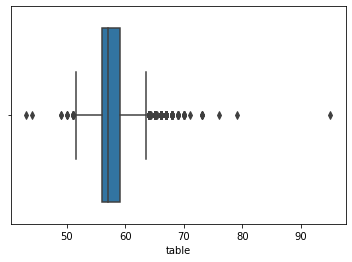

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [10]:
alt_sinir

51.5

In [11]:
ust_sinir

63.5

In [12]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
aykiri_tf = (df_table < alt_sinir)

In [14]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [15]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [16]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Değer Problemini Çözmek

In [17]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme

In [ ]:
import pandas as pd

In [ ]:
type(df_table)

In [ ]:
df_table = pd.DataFrame(df_table)

In [ ]:
df_table.shape

In [ ]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [ ]:
t_df.shape

### Ortalama ile Doldurma

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]

In [ ]:
aykiri_tf.head()

In [ ]:
df_table[aykiri_tf]

In [ ]:
df_table.mean()

In [ ]:
df_table[aykiri_tf] = df_table.mean()

In [ ]:
df_table[aykiri_tf]

### Baskılama Yöntemi

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]

In [ ]:
df_table[aykiri_tf]

In [ ]:
alt_sinir

In [ ]:
df_table[aykiri_tf] = alt_sinir

In [ ]:
df_table[aykiri_tf]

## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [ ]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [ ]:
clf.fit_predict(df)

In [ ]:
df_scores = clf.negative_outlier_factor_

In [ ]:
df_scores[0:10]

In [ ]:
np.sort(df_scores)[0:20]

In [ ]:
esik_deger = np.sort(df_scores)[13]

In [ ]:
aykiri_tf = df_scores > esik_deger

In [ ]:
aykiri_tf

In [ ]:
### silme yöntemi

In [ ]:
yeni_df  = df[df_scores > esik_deger]

In [ ]:
yeni_df

In [ ]:
df[df_scores < esik_deger]

In [ ]:
df[df_scores == esik_deger]

In [ ]:
### baskilama

In [ ]:
baski_deger = df[df_scores == esik_deger]

In [ ]:
aykirilar = df[~aykiri_tf]

In [ ]:
aykirilar

In [ ]:
aykirilar.to_records(index = False)

In [ ]:
res = aykirilar.to_records(index = False)

In [ ]:
res[:] = baski_deger.to_records(index = False)

In [ ]:
res

In [ ]:
df[~aykiri_tf]

In [ ]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [ ]:
df[~aykiri_tf]

# Eksik Veri Analizi

## Hızlı Çözüm

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.isnull().sum()

In [ ]:
df.notnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull()

In [ ]:
df[df.isnull().any(axis = 1)]

In [ ]:
df[df.notnull().all(axis = 1)]

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

In [ ]:
#eksik degerlerin direk silinmesi

In [ ]:
df.dropna()

In [ ]:
df

In [ ]:
#basit deger atama

In [ ]:
df["V1"]

In [ ]:
df["V1"].mean()

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df["V2"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

## Eksik Değerlerin Saptanması

In [ ]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

In [ ]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

In [ ]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

In [ ]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

In [ ]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

## Eksik Veri Yapısının Görselleştirilmesi

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
msno.bar(df);

In [ ]:
msno.matrix(df);

In [ ]:
df

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
msno.matrix(df);

In [ ]:
msno.heatmap(df);

## Silme Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna()

In [ ]:
df

In [ ]:
df.dropna(how = "all")

In [ ]:
df.dropna(axis = 1)

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df["sil_beni"] = np.nan

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

## Değer Atama Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
#sayısal degiskenlerde atama 

In [ ]:
df["V1"].fillna(0)

In [ ]:
df

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
#tum degiskenler icin birinci yol
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [ ]:
#ikinci yol

In [ ]:
df.fillna(df.mean()[:])

In [ ]:
df.fillna(df.mean()["V1":"V2"])

In [ ]:
df["V3"].fillna(df["V3"].median())

In [ ]:
#ucuncu yol

In [ ]:
df.where(pd.notna(df), df.mean(), axis = "columns")

## Kategorik Değişken Kırılımında Değer Atama

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.groupby("departman")["maas"].mean()

In [ ]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

## Kategorik Değişkenler için Eksik Değer Atama

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [2]:
df["departman"].mode()[0]

'IK'

In [3]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [5]:
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [6]:
# sonraki değerle doldurma işlemi
df["departman"].fillna(method = "bfill")


0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [7]:
# önceki değerle doldurma işlemi
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Tahmine Dayalı Değer Atama Yöntemleri

In [1]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [2]:
# ycimpute ile tahmine dayalı işlemleri yapabilimemiz için indirdik.
!pip install ycimpute

In [3]:
from ycimpute.imputer import knnimput

In [4]:
var_names = list(df)

In [6]:
import numpy as np
n_df = np.array(df)

In [8]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [9]:
n_df.shape

(891, 6)

In [10]:
# k burda komşuluk sayısını ifade eder
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.127
Imputing row 101/891 with 0 missing, elapsed time: 0.128
Imputing row 201/891 with 0 missing, elapsed time: 0.129
Imputing row 301/891 with 1 missing, elapsed time: 0.130
Imputing row 401/891 with 0 missing, elapsed time: 0.131
Imputing row 501/891 with 0 missing, elapsed time: 0.132
Imputing row 601/891 with 0 missing, elapsed time: 0.133
Imputing row 701/891 with 0 missing, elapsed time: 0.134
Imputing row 801/891 with 0 missing, elapsed time: 0.135


In [11]:
type(dff)

numpy.ndarray

In [13]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [14]:
type(dff)

pandas.core.frame.DataFrame

In [15]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
#random forests

In [16]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [17]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [18]:
var_names = list(df)

In [19]:
import numpy as np
n_df = np.array(df)

In [20]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
dff = pd.DataFrame(dff, columns = var_names)

In [22]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
#EM 

In [23]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [24]:
from ycimpute.imputer import EM

In [25]:
var_names = list(df)

In [26]:
import numpy as np
n_df = np.array(df)

In [27]:
dff = EM().complete(n_df)

In [28]:
dff = pd.DataFrame(dff, columns = var_names)

In [29]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [2]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## DÖNÜŞÜM İŞLEMLERİ

## Standardizasyon

Veri setinin taşımış olduğu bilgiyi bozmadan belirli bir standarta getirir. Bilgiyi değiştirir. Özütünü bozmadan belirli bir standarta getirir.

In [3]:
from sklearn import preprocessing 

In [4]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [8]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Normalizasyon

Verileri 0-1 arasına dönüştürür.

In [9]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [14]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

## Değişken Dönüşümleri

Veri setinin taşımış olduğu bilgiyi bazen bozar bazen de temsil şeklini değiştirir.



In [21]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü

In [22]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [23]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [24]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### "1 ve Diğerleri (0) " Dönüşümü

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [27]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [28]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [29]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### Çok Sınıflı Dönüşüm

In [28]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [29]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [ ]:
#cok dikkat 

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

- One-Hot dönüşümü elimizdeki kategorik değişkenleri eğer nümerik değerlere dönüştürme işlemidir.
- Dummy Değişken Tuzağı eğer veri seti içerisindeki değişkenlere bir dönüşüm uygulandığında eğer bu dönüşüm sonrasında oluşturulan yeni değişkenler birbirleri üzerinden oluşturulabilmesi durumudur. Yani bir değişkeni ifade eden başka birdeğişken varsa bu duruma dummy değişken tuzağı denir.

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [32]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [33]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [34]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


# Bölüm Sonu Değerlendirmesi

Veri Ön İşleme 

Aykırı Gözlem Analizi

Eksik Gözlem Analizi

Değişken Standartlaştırma

Değişken Dönüştürme